# Algoritmo de Shor

El algoritmo de Shor, que lleva el nombre del matemático Peter Shor, es un algoritmo cuántico de ejecucion en tiempo polinómico para la factorización de enteros formulado en 1994.

El algoritmo de Shor ha sido implementado experimentalmente por varios equipos: 
* (7 qubits NMR) El número compuesto $15$ se factorizó por primera vez en $3 \times 5$ en [2001](https://www.nature.com/nature/journal/v414/n6866/full/414883a.html)
* (4 qubits fotonicos) [Dos](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.250504) [equipos](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.99.250505) lo implementaron en 2007
* (3 qubits estado solido) Implementado en [2012](https://www.nature.com/nphys/journal/v8/n10/full/nphys2385.html)
* (5 qubits trapped ions) Implementado en [2016](http://science.sciencemag.org/content/351/6277/1068)
* Y mas..!!

En general se necesitan $2 + \frac{3}{2}\log_2N$ qubits para factorizar un entero $N$, lo que significa que se necesitan al menos $1,154$ qubits para factorizar un numero semiprimo de $768$ bits

# Preliminares
## Introduccion a la Aritmetica Modular

**Parte Entera:** La parte entera de un numero real $u$ se define como:
<center>$\lfloor{u}\rfloor=max\{z\in\mathbb{Z}|z\le u\}$</center>
Asi mismo:
<center>$\lceil{u}\rceil=min\{z\in\mathbb{Z}|z\ge u\}$</center>
Para $a \in \mathbb{Z}$ el residuo de $a$ despues de ser dividido por $N \in \mathbb{N}$ se define como:
<center>$a \mod N=a-\lfloor \frac{a}{N}\rfloor N$</center>
Como consecuencia:
<center>$a\mod\ N \iff \exists z \in \mathbb{Z}: a=zN$</center>

**Divisible:** Si para $a,b \in \mathbb{Z}$, eviste un $z \in \mathbb{Z}$ tal que $b=za$, entonces $a$ divide $b$, si $z$ no existe, $a$ no divide a $b$:
<center>$a \mid b: \iff \exists z \in \mathbb{Z}: b=za$</center>

<center>$a \nmid b: \iff \nexists z \in \mathbb{Z}: b=za$</center>


**Maximo Comun Divisor:** Para numeros enteros $a_{i} \in \mathbb{Z}$ con $i \in \{1, \cdots ,n \}$ y $\sum^{n}_{i=1}|a_{i}|\neq 0$ definimos el maximo comun divisor como:
<center>$gcd(a_1,\cdots,a_n) =max\{k\in \mathbb{Z} | k\mid a_i \forall a_i\}$</center>
Para $a\neq 0$ definimos $gcd(a,0)= a$. Si $a$ y $b$ no tienen un divisor comun diferente de $1$ entonces:

<center>$gcd(a,b) = 1$</center>

y $a$ y $b$ son llamados <u>**<i>coprimos</i>**</u>


## Algoritmo de Euclides
Dados $a,b \in \mathbb{N}$ definimos:

<center>
\begin{flalign} 
& r_{-1}=max\ \{a,b \}\; and\; r_{0}=min\{ a,b \}\\
& s_{-1}=1\; and \;s_{0}=0\\
& t_{-1}=0\; and \;t_{0}=1
\end{flalign}
</center>

para cada $j\in \mathbb{N}$ con $r_{j-1}>0$
<center>
\begin{flalign} 
& r_{j}=r_{j-2}\mod r_{j-1}\\
& s_{j}=s_{j-2}-\Bigl\lfloor \frac{r_{j-2}}{r_{j-1}}\Bigr\rfloor s_{j-1}\\
& t_{j}=t_{j-2}-\Bigl\lfloor \frac{r_{j-2}}{r_{j-1}}\Bigr\rfloor t_{j-1}
\end{flalign}
</center>

Tenemos que $r_j<r_{j-1}$, y hay un $n\in \mathbb{N}$ donde la secuencia termina eso es para $r_{n+1}=0$. Adicionalmente:

<center>
\begin{flalign} 
& r_{n}=gcd(a,b)\\
& n\le 2 min\{\log_2 a, \log_2 b\}+1\\
& r_{-1}s_{n}+r_{0}t_{n}=gcd(a,b)
\end{flalign}
</center>



**Ejemplo 1:** 

Encuentre el $gcd(999,351)$

| $j$ | $r_j$ | $s_j$ | $t_j$ | $as_j + bt_j$ |
|:-:|:-|-:|-:|-:|
|−1| a = 999        |1   |0   |999|
|0 |b = 351         |0   |1   |351|
|1 |999mod351 = 297 |1   |−2  |297|
|2 |351mod297 = 54  |−1  |3   |54 |
|3 |297mod54 = 27   |6   |−17 |27 |
|4 |54mod27 = 0     |−13 | 37 |0  |

<i> Respuesta: $gcd(999,351)=27$

**Ejemplo 2:** 

Encuentre el $gcd(999,352)$

| $j$ | $r_j$ | $s_j$ | $t_j$ | $as_j + bt_j$ |
|:-:|:-|-:|-:|-:|
|−1| a = 999        |1    |0    |999|
|0 |b = 352         |0    |1    |352|
|1 |999mod352 = 295 |1    |−2   |295|
|2 |352mod295 = 57  |−1   |3    |57 | 
|3 |295mod57 = 10   |6    |−17  |10 |  
|4 |57mod10 = 7     |−31  |88   |7  |  
|5 |10mod7 = 3      |37   |−105 |3  |   
|6 |7mod3 = 1       |−105 |−298 |1  | 
|7 |3mod1 = 0       |352  |−999 |0  |  

<i> Respuesta: $gcd(999,352)=1$

## Fracciones Continuas
La idea de este algoritmo es expresar numeros reales en terminos de numeros enteros positivos usando la siguiente expresion: 
\begin{align}
\mathrm{[a_0,\cdots,a_M]}\equiv
a_0+\cfrac{1}{a_1+\cfrac{1}{a_2+\cfrac{1}{\cdots+\cfrac{1}{a_M\vphantom{\cfrac{1}{1}} }}}}
\end{align}

Supongamos que estamos tratando de descomponer $\frac{31}{13}$ como fracción continua. El primer paso del algoritmo de fracciones continuas es dividir $\frac{31}{13}$ en su parte entera y fraccionaria:

$$\frac{31}{13}= 2+\frac{5}{13}$$

Invertimos la parte fraccionaria: 

$$\frac{31}{13}= 2+\frac{1}{\frac{13}{5}}$$

Repetimos el procedimiento para $\frac{13}{5}$:
$$\frac{31}{13}= 2+\frac{1}{2+\frac{3}{5}}=2+\frac{1}{2+\frac{1}{\frac{5}{3}}}$$
Repetimos el procedimiento para $\frac{5}{3}$:
$$\frac{31}{13}=2+\frac{1}{2+\frac{1}{1+\frac{2}{3}}}=2+\frac{1}{2+\frac{1}{1+\frac{1}{\frac{3}{2}}}}$$

En este punto termina la descomposicion ya que:

$$\frac{3}{2}=1+\frac{1}{2}$$

Finalmente obtenemos:
$$\frac{31}{13}=2+\frac{1}{2+\frac{1}{1+\frac{1}{1+\frac{1}{2}}}}$$

# El Problema de Factorización

## Factorización 
#### La factorización de números enteros es la descomposición de un número entero compuesto en un producto de números enteros más pequeños.

La factorización de números primos es la descomposición de un número entero compuesto en un producto de números primos, por ejemplo la factorización de $100$ es:
<center>
    $2\times2\times2\times5\times5$
</center>

* Cuando los números enteros son muy grandes, no se conoce ningún algoritmo clásico eficiente de factorización de enteros.
* Los problemas de factorización más difíciles son los que involucran números semiprimos, el producto de dos números primos.
  * **Numero Semiprimo:** El producto de dos numeros primos

## El uso de números primos
* En la presunta dificultad de factorizar números semiprimos sustenta muchos algoritmos de cifrado, como RSA, que se utiliza en transacciones con tarjetas de crédito en línea, entre otras aplicaciones.
* No hay justificación para el salto de “las computadoras cuánticas destruyen los algoritmos de clave pública” a “las computadoras cuánticas destruyen la criptografía”.


### De la factorización al calculo del período

La teoría de números que sustenta el algoritmo de Shor se relaciona con secuencias de módulo periódicas. Por ejemplo evaluemos la secuencia de las potencias de dos:

$$1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024, ...$$

Si de esta secuencia obtenemos el 'módulo 15', el residuo después de dividir por quince cada elemento es:

$$1, 2, 4, 8, 1, 2, 4, 8, 1, 2, 4, ...$$

Esta es una secuencia de módulos que se repite cada cuatro números, es decir, una secuencia de módulos periódica con un período de cuatro.

La reducción de la factorización de $N$ al problema de encontrar el período de un número entero $x$ menor que $N$ y mayor que $1$ depende del siguiente resultado de la teoría de números:

> La funcion $\mathcal{F}(a) = x^a \bmod N$ es una funcion periodica, donde $x$ es un numero entero coprimo con $N$ y $a \ge 0$.

Dado que $\mathcal{F}(a)$ es una función periódica, tiene un período $r$. Sabiendo que $x^0 \bmod N = 1$, esto significa que $x^r \bmod N = 1$ ya que la función es periódica y, por lo tanto, $r$ es solo la primera potencia distinta de cero donde $x^r = 1 (\bmod N)$.


A partir de la ultima conclusión podemos re-escribir la expresión:
$$ x^r \equiv 1 \bmod N $$
$$ x^r = (x^{r/2})^2 \equiv 1 \bmod N $$
$$ (x^{r/2})^2 - 1 \equiv 0 \bmod N $$
escogiendo $r$ commo un numero par podemos expandir la expresion a:
$$ (x^{r/2} + 1)(x^{r/2} - 1) \equiv 0 \bmod N $$

El producto $(x^{r/2} + 1)(x^{r/2} - 1)$ es un entero multiplo de $N$, el numero a factorizar. Por lo tanto, mientras $(x^{r/2} + 1)$ o $(x^{r/2} - 1)$ no sean un multiplo $N$, entonces al menos uno de ellos debe tener un factor no tribial en comun con $N$. 

Entonces, calculando $\text{gcd}(x^{r/2} - 1, N)$ y $\text{gcd}(x^{r/2} + 1, N)$ se obtendrá un factor de $N $, donde $\text{gcd}$ se puede calcular mediante el [algoritmo Euclides](https://en.wikipedia.org/wiki/Euclidean_algorithm).

## Una primera aproximacion 
Supongamos por un momento que existe una máquina de búsqueda de períodos que toma como entrada números enteros coprimos $x, N$ y genera el período de $x \bmod N$. Vamos a usar la máquina para encontrar todos los factores primos de $N$ usando la teoría anteriormente. 
<center>Vamos a asumir que $N$ tiene solo dos factores primos: $N=pq$</center> 

In [2]:
# Brute force period finding algorithm
def find_period_classical(x, N):
    n = 1
    t = x
    while t != 1:
        t *= x
        t %= N
        n += 1
    return n

#### Pasos clásicos del algoritmo de Shor

 $N=pq$

1. Elejir un número entero aleatorio $x$ entre $1$ y $N$ y calcule el máximo común divisor $\text{gcd}(x,N)$ usando el algoritmo de Euclides.
2. Si $x$ y $N$ tienen algun factor primos comun, $\text{gcd}(x,N)$ será igual a $p$ o $q$. De lo contrario, $\text{gcd}(x,N) = 1$, lo que significa que $x$ y $N$ son coprimos. 
3. Sea $r$ el período de $x \bmod N$ calculado por la máquina de búsqueda de períodos. Repita los pasos anteriores con diferentes opciones aleatorias de $x$ hasta que $r$ sea par.
4. Ahora $p$ y $q$ se pueden encontrar calculando $\text{gcd}(x^{r/2} \pm 1, N)$ siempre que $x^{r/2} \neq \pm 1$.






## Ejemplo:
Considere $N = 15$. Veamos todos los valores de $1 < x < 15$ donde $x$ es coprimo con $15$:

|  $x$  |         $x^a \bmod 15$       | Periodo $r$ |$\text{gcd}(x^{r/2}-1,15)$|$\text{gcd}(x^{r/2}+1,15)$ | 
|:-----:|:----------------------------:|:----------:|:------------------------:|:-------------------------:|
|   2   | 1,2,4,8,1,2,4,8,1,2,4...     |      4     |             3            |             5             |
|   4   | 1,4,1,4,1,4,1,4,1,4,1...     |      2     |             3            |             5             |
|   7   | 1,7,4,13,1,7,4,13,1,7,4...   |      4     |             3            |             5             |
|   8   | 1,8,4,2,1,8,4,2,1,8,4...     |      4     |             3            |             5             |
|   11  | 1,11,1,11,1,11,1,11,1,11,1...|      2     |             5            |             3             |
|   13  | 1,13,4,7,1,13,4,7,1,13,4,... |      4     |             3            |             5             |
|   14  | 1,14,1,14,1,14,1,14,1,14,1,,,|      2     |             1            |             15            |

Como puede verse, cualquier valor de $x$ excepto $14$ devolverá los factores de $15$, es decir, $3$ y $5$. $14$ es un ejemplo del caso especial donde $(x^{r/2} + 1)$ o $(x^{r/2} - 1)$ es un múltiplo de $N$ y por lo tanto hay que intentar otro valor $x$.


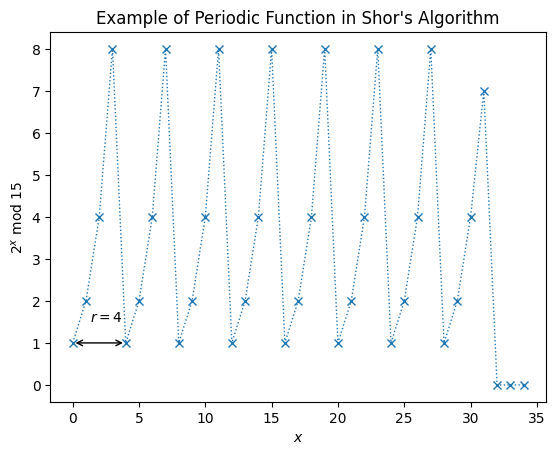

In [19]:
import numpy as np
import matplotlib.pyplot as plt
N = 15
a = 2

# Calculate the plotting data
xvals = np.arange(35)
yvals = [np.mod(a**x, N) for x in xvals]

# Use matplotlib to display it nicely
fig, ax = plt.subplots()
ax.plot(xvals, yvals, linewidth=1, linestyle='dotted', marker='x')
ax.set(xlabel='$x$', ylabel=f'${a}^x$ mod ${N}$',
       title="Example of Periodic Function in Shor's Algorithm")
try: # plot r on the graph
    r = yvals[1:].index(1) + 1
    plt.annotate('', xy=(0,1), xytext=(r,1),
                 arrowprops=dict(arrowstyle='<->'))
    plt.annotate(f'$r={r}$', xy=(r/3,1.5))
except ValueError:
    print('Could not find period, check a < N and have no common factors.')

## Un mejor Ejemplo:
Encontremos un número semiprimo (producto de dos numeros primos) mayor. Usando el algoritmo de Criba de Eratóstenes generamos una lista de los primero 1000 numeros primos, seleccionamos dos y los multiplicamos.

In [3]:
import random, itertools

# Sieve of Eratosthenes algorithm
def sieve( ):
    D = {  }
    yield 2
    for q in itertools.islice(itertools.count(3), 0, None, 2):
        p = D.pop(q, None)
        if p is None:
            D[q*q] = q
            yield q
        else:
            x = p + q
            while x in D or not (x&1):
                x += p
            D[x] = p


In [4]:
# Creates a list of prime numbers up to the given argument
def get_primes_sieve(n):
    return list(itertools.takewhile(lambda p: p<n, sieve()))

def get_semiprime(n):
    primes = get_primes_sieve(n)
    l = len(primes)
    p = primes[random.randrange(l)]
    q = primes[random.randrange(l)]
    return p*q

N = get_semiprime(1000)

print("semiprime N =",N)

semiprime N = 216031


#### Pasos clásicos del algoritmo de Shor

 $N=pq$

1. Elejir un número entero aleatorio $x$ entre $1$ y $N$ y calcule el máximo común divisor $\text{gcd}(x,N)$ usando el algoritmo de Euclides.
2. Si $x$ y $N$ tienen algun factor primos comun, $\text{gcd}(x,N)$ será igual a $p$ o $q$. De lo contrario, $\text{gcd}(x,N) = 1$, lo que significa que $x$ y $N$ son coprimos. 
3. Sea $r$ el período de $x \bmod N$ calculado por la máquina de búsqueda de períodos. Repita los pasos anteriores con diferentes opciones aleatorias de $x$ hasta que $r$ sea par.
4. Ahora $p$ y $q$ se pueden encontrar calculando $\text{gcd}(x^{r/2} \pm 1, N)$ siempre que $x^{r/2} \neq \pm 1$.

In [12]:
import math

def shors_algorithm_classical(N):
    x = random.randint(0,N) # step one
    if(math.gcd(x,N) != 1): # step two
        return x,0,math.gcd(x,N),N/math.gcd(x,N)
    r = find_period_classical(x,N) # step three
    while(r % 2 != 0):
        r = find_period_classical(x,N)
    p = math.gcd(x**int(r/2)+1,N) # step four, ignoring the case where (x^(r/2) +/- 1) is a multiple of N
    q = math.gcd(x**int(r/2)-1,N)
    return x,r,p,q

x,r,p,q = shors_algorithm_classical(N)
print("semiprime N = ",N,", coprime x = ",x,", period r = ",r,", prime factors = ",p," and ",q,sep="")

semiprime N = 216031, coprime x = 175798, period r = 35844, prime factors = 349 and 619


# Algoritmo Cuantico de Shor
1. Elija aleatoriamente un número entero a tal que $0 < a <N$. Utilice el algoritmo euclidiano para determinar si $a$ y $N$ son coprimos. Si no, hemos encontrado un factor de $N$. De lo contrario, aplique el resto del algoritmo.
2. Utilice el paralelismo cuántico para calcular $f(x)=a^x\mod N$ en la superposición de entradas, y aplique la QFT al resultado. Basta con considerar valores de entrada $x \in \{0, \cdots , 2n −1\}$, donde $n$ es tal que $N^2 ≤ 2n < 2N^2$.
3. Medir. Con una alta probabilidad, se obtendrá un valor $v$ cercano a un múltiplo de $\frac{2^n}{r}$.
4. Utilice métodos clásicos para obtener un período $r$ conjeturado a partir del valor $v$.
5. Cuando $r$ es par, utilice el algoritmo euclidiano para comprobar eficientemente si $(x^{r/2} +1)$ o $(x^{r/2}−1)$ tiene un factor común no trivial con $N$.
6. Repita todos los pasos si es necesario.

## Encontrar el Periodo usando QC
La solución de Shor fue utilizar la estimación de fase cuántica en el operador unitario:

$$ U|y\rangle \equiv |ay \bmod N \rangle $$

Para ver cómo esto es útil, determinemos cómo sería un estado propio de $U$. Si comenzamos en el estado $|1\rangle$, podemos ver que cada aplicación sucesiva de U multiplicará el estado de nuestro registro por $a \pmod N$, y después de $r$ aplicaciones llegaremos al estado $ |1\rangle$ nuevamente. Por ejemplo con $a = 3$ y $N = 35$:

$$\begin{aligned}
U|1\rangle &= |3\rangle & \\
U^2|1\rangle &= |9\rangle \\
U^3|1\rangle &= |27\rangle \\
& \vdots \\
U^{(r-1)}|1\rangle &= |12\rangle \\
U^r|1\rangle &= |1\rangle 
\end{aligned}$$


Una superposicion de estados en este ciclo seria un estado propodio de $U$:

$$|u_0\rangle = \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{|a^k \bmod N\rangle} $$

Este estado propio tiene un valor propio de $1$, lo cual no es muy interesante. Un estado propio más interesante podría ser aquel en el que la fase sea diferente para cada uno de los estados de la base computacional. Específicamente, veamos el caso en el que la fase del estado $k^\text{th}$ es proporcional a $k$:

$$\begin{aligned}
|u_1\rangle &= \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i k}{r}}|a^k \bmod N\rangle}\\[10pt]
U|u_1\rangle &= e^{\tfrac{2\pi i}{r}}|u_1\rangle 
\end{aligned}
$$

Este es un valor propio particularmente interesante ya que contiene $r$. De hecho, se debe incluir $r$ para garantizar que las diferencias de fase entre los estados de la base computacional de $r$ sean iguales. Este no es el único estado propio con este comportamiento; Para generalizar esto aún más, podemos multiplicar un número entero, $s$, por esta diferencia de fase, que aparecerá en nuestro valor propio:

$$\begin{aligned}
|u_s\rangle &= \tfrac{1}{\sqrt{r}}\sum_{k=0}^{r-1}{e^{-\tfrac{2\pi i s k}{r}}|a^k \bmod N\rangle}\\[10pt]
U|u_s\rangle &= e^{\tfrac{2\pi i s}{r}}|u_s\rangle 
\end{aligned}
$$

Ahora tenemos un estado propio único para cada valor entero de $s$ donde $0 \leq s \leq r-1.$ Muy convenientemente, si sumamos todos estos estados propios, las diferentes fases cancelan todos los estados  de la base computacionale excepto $|1 \rangle$:

$$ \tfrac{1}{\sqrt{r}}\sum_{s=0}^{r-1} |u_s\rangle = |1\rangle$$

Dado que el estado de la base computacional $|1\rangle$ es una superposición de estos estados propios, significa que si hacemos QPE en $U$ usando el estado $|1\rangle$, mediremos una fase:

$$\phi = \frac{s}{r}$$

Donde $s$ es un número entero aleatorio entre $0$ y $r-1$. Finalmente usamos el algoritmo [fracciones continuas](https://en.wikipedia.org/wiki/Continued_fraction) en $\phi$ para encontrar $r$. El diagrama del circuito se ve así: 

<img src="images/shor_circuit_1.svg">


## Implementacion en Qiskit 

Resolveremos el problema de encontrar el período para $a=7$ y $N=15$. Proporcionamos los circuitos por $U$ donde (por ahora sin explicarlo):

$$U|y\rangle = |ay\bmod 15\rangle $$

Para crear $U^x$, simplemente repetiremos el circuito $x$ veces. La función `c_amod15` devuelve la puerta U controlada durante `a`, repetidas veces `power`.

In [26]:
def c_amod15(a, power):
    """Controlled multiplication by a mod 15"""
    if a not in [2,4,7,8,11,13]:
        raise ValueError("'a' must be 2,4,7,8,11 or 13")
    U = QuantumCircuit(4)
    for _iteration in range(power):
        if a in [2,13]:
            U.swap(2,3)
            U.swap(1,2)
            U.swap(0,1)
        if a in [7,8]:
            U.swap(0,1)
            U.swap(1,2)
            U.swap(2,3)
        if a in [4, 11]:
            U.swap(1,3)
            U.swap(0,2)
        if a in [7,11,13]:
            for q in range(4):
                U.x(q)
    U = U.to_gate()
    U.name = f"{a}^{power} mod 15"
    c_U = U.control()
    return c_U

Usaremos 8 qubits para contar:

In [27]:
# Specify variables
N_COUNT = 8  # number of counting qubits
a = 7

Implementamos la transformada de Fourier

In [28]:
def qft_dagger(n):
    """n-qubit QFTdagger the first n qubits in circ"""
    qc = QuantumCircuit(n)
    # Don't forget the Swaps!
    for qubit in range(n//2):
        qc.swap(qubit, n-qubit-1)
    for j in range(n):
        for m in range(j):
            qc.cp(-np.pi/float(2**(j-m)), m, j)
        qc.h(j)
    qc.name = "QFT†"
    return qc

Construimos el circuito para implementar el algoritmo de Shor:

In [32]:
# pylint: disable=invalid-name
import matplotlib.pyplot as plt
import numpy as np
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from math import gcd
from numpy.random import randint
import pandas as pd
from fractions import Fraction
from qiskit_aer import AerSimulator

In [33]:

# Create QuantumCircuit with N_COUNT counting qubits
# plus 4 qubits for U to act on
qc = QuantumCircuit(N_COUNT + 4, N_COUNT)

# Initialize counting qubits
# in state |+>
for q in range(N_COUNT):
    qc.h(q)

# And auxiliary register in state |1>
qc.x(N_COUNT)

# Do controlled-U operations
for q in range(N_COUNT):
    qc.append(c_amod15(a, 2**q),
             [q] + [i+N_COUNT for i in range(4)])

# Do inverse-QFT
qc.append(qft_dagger(N_COUNT), range(N_COUNT))

# Measure circuit
qc.measure(range(N_COUNT), range(N_COUNT))
qc.draw(fold=-1)  # -1 means 'do not fold'

┌───┐                                                                                                                             ┌───────┐┌─┐                     
 q_0: ┤ H ├───────■─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┤0      ├┤M├─────────────────────
      ├───┤       │                                                                                                                     │       │└╥┘┌─┐                  
 q_1: ┤ H ├───────┼──────────────■──────────────────────────────────────────────────────────────────────────────────────────────────────┤1      ├─╫─┤M├──────────────────
      ├───┤       │              │                                                                                                      │       │ ║ └╥┘┌─┐               
 q_2: ┤ H ├───────┼──────────────┼──────────────■───────────────────────────────────────────────────────────────────────────────────────┤2      ├─╫──╫─┤M├───────────────
      ├───┤       │              │              │                                                                                       │       │ ║  ║ └╥┘┌─┐            
 q_3: ┤ H ├───────┼──────────────┼──────────────┼──────────────■────────────────────────────────────────────────────────────────────────┤3      ├─╫──╫──╫─┤M├────────────
      ├───┤       │              │              │              │                                                                        │  QFT† │ ║  ║  ║ └╥┘┌─┐         
 q_4: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────■─────────────────────────────────────────────────────────┤4      ├─╫──╫──╫──╫─┤M├─────────
      ├───┤       │              │              │              │              │                                                         │       │ ║  ║  ║  ║ └╥┘┌─┐      
 q_5: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────■─────────────────────────────────────────┤5      ├─╫──╫──╫──╫──╫─┤M├──────
      ├───┤       │              │              │              │              │               │                                         │       │ ║  ║  ║  ║  ║ └╥┘┌─┐   
 q_6: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────■─────────────────────────┤6      ├─╫──╫──╫──╫──╫──╫─┤M├───
      ├───┤       │              │              │              │              │               │               │                         │       │ ║  ║  ║  ║  ║  ║ └╥┘┌─┐
 q_7: ┤ H ├───────┼──────────────┼──────────────┼──────────────┼──────────────┼───────────────┼───────────────┼────────────────■────────┤7      ├─╫──╫──╫──╫──╫──╫──╫─┤M├
      ├───┤┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴──────┐┌──────┴───────┐┌──────┴───────┐┌──────┴───────┐┌───────┴───────┐└───────┘ ║  ║  ║  ║  ║  ║  ║ └╥┘
 q_8: ┤ X ├┤0            ├┤0            ├┤0            ├┤0            ├┤0             ├┤0             ├┤0             ├┤0              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
      └───┘│             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
 q_9: ─────┤1            ├┤1            ├┤1            ├┤1            ├┤1             ├┤1             ├┤1             ├┤1              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │  7^1 mod 15 ││  7^2 mod 15 ││  7^4 mod 15 ││  7^8 mod 15 ││  7^16 mod 15 ││  7^32 mod 15 ││  7^64 mod 15 ││  7^128 mod 15 │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_10: ─────┤2            ├┤2            ├┤2            ├┤2            ├┤2             ├┤2             ├┤2             ├┤2              ├──────────╫──╫──╫──╫──╫──╫──╫──╫─
           │             ││             ││             ││             ││              ││              ││              ││               │          ║  ║  ║  ║  ║  ║  ║  ║ 
q_11: ─────┤3            ├┤3            ├┤3            ├┤3            ├┤3             ├┤3       

Realizamos la medicion:

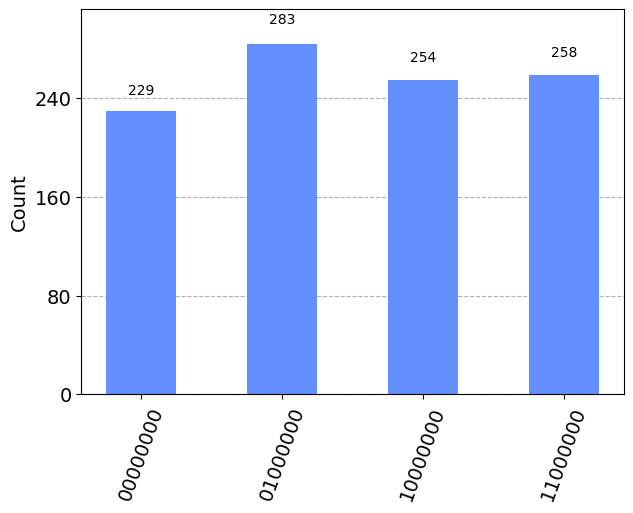

In [34]:
backend = AerSimulator()
t_qc = transpile(qc, backend)
counts = backend.run(t_qc).result().get_counts()
plot_histogram(counts)

Como tenemos 8 qubits, estos resultados corresponden a fases medidas de:

In [36]:
rows, measured_phases = [], []
for output in counts:
    decimal = int(output, 2)  # Convert (base 2) string to decimal
    phase = decimal/(2**N_COUNT)  # Find corresponding eigenvalue
    measured_phases.append(phase)
    # Add these values to the rows in our table:
    rows.append([f"{output}(bin) = {decimal:>3}(dec)",
                 f"{decimal}/{2**N_COUNT} = {phase:.2f}"])
# Print the rows in a table
headers=["Register Output", "Phase"]
df = pd.DataFrame(rows, columns=headers)
print(df)

            Register Output           Phase
0  00000000(bin) =   0(dec)    0/256 = 0.00
1  10000000(bin) = 128(dec)  128/256 = 0.50
2  01000000(bin) =  64(dec)   64/256 = 0.25
3  11000000(bin) = 192(dec)  192/256 = 0.75


Ahora podemos usar el algoritmo de fracciones continuas para intentar encontrar $s$ y $r$. Python tiene esta funcionalidad incorporada: podemos usar el módulo `fractions` para convertir un flotante en un objeto `Fraction`, podemos usar el método `.limit_denominator()` para obtener la fracción que más se parezca a nuestro float, con un denominador por debajo de cierto valor, por ejemplo:

In [37]:
# Get fraction that most closely resembles 0.666
# with denominator < 15
Fraction(0.666).limit_denominator(15)

Fraction(2, 3)

El orden $(r)$  debe ser menor de $N$, asi que limitaremos el denominador a $15$:

In [38]:
rows = []
for phase in measured_phases:
    frac = Fraction(phase).limit_denominator(15)
    rows.append([phase,
                 f"{frac.numerator}/{frac.denominator}",
                 frac.denominator])
# Print as a table
headers=["Phase", "Fraction", "Guess for r"]
df = pd.DataFrame(rows, columns=headers)
print(df)

   Phase Fraction  Guess for r
0   0.00      0/1            1
1   0.50      1/2            2
2   0.25      1/4            4
3   0.75      3/4            4


Podemos ver que dos de los valores propios medidos nos proporcionaron el resultado correcto: $r=4$, y podemos ver que el algoritmo de Shor tiene posibilidades de fallar. Estos malos resultados se deben a que $s = 0$, o porque $s$ y $r$ no son coprimos y en lugar de $r$ nos dan un factor de $r$. La solución más sencilla a esto es simplemente repetir el experimento hasta obtener un resultado satisfactorio para $r$.

## Exponenciación modular
El método de crear las compuertas $U^{2^j}$ repitiendo $U$ crece exponencialmente con $j$ y no dará como resultado un algoritmo de tiempo polinómico. Queremos una forma de crear el operador:

$$ U^{2^j}|y\rangle = |a^{2^j}y \bmod N \rangle $$

que crece polinomialmente con $j$. Afortunadamente, calcular $$ a^{2^j} \bmod N$$ eficientemente es posible. 

Esto se puede realizar usando la siguiente identidad para la representación binaria de cualquier número entero: $x = x_{t-1}2^{t-1} + \cdots x_12^1+x_02^0$, donde $x_t$ son los dígitos binarios de $x$. De esto se desprende que:

\begin{align}
x^a \bmod N & = x^{2^{(t-1)}a_{t-1}} ... x^{2a_1}x^{a_0} \bmod N \\
& = x^{2^{(t-1)}a_{t-1}} ... [x^{2a_1}[x^{2a_0} \bmod N] \bmod N] ... \bmod N \\
\end{align}

Esto significa que 1 se multiplica primero por $x^1 \bmod N$ si y solo si $a_0 = 1$, entonces el resultado se multiplica por $x^2 \bmod N$ si y solo si $a_1 = 1$ y así sucesivamente, hasta que finalmente el resultado se multiplica por $x^{2^{(s-1)}}\bmod N$ si y sólo si $a_{t-1} = 1$.

Por lo tanto, la exponenciación modular consta de $t$ multiplicaciones seriales módulo $N$, cada una de ellas controlada por el qubit $y$.

Las computadoras clásicas pueden usar un algoritmo conocido como _cuadrado repetido_ para calcular una exponencial. En nuestro caso, dado que solo estamos tratando con exponenciales de la forma $2^j$, el algoritmo de elevación al cuadrado repetido se vuelve muy simple:

In [41]:
def a2jmodN(a, j, N):
    """Compute a^{2^j} (mod N) by repeated squaring"""
    for _ in range(j):
        a = np.mod(a**2, N)
    return a

In [42]:
a2jmodN(7, 2049, 53)

47

Si es posible un algoritmo eficiente en Python, entonces podemos usar el mismo algoritmo en una computadora cuántica. Desafortunadamente, a pesar de escalar polinomialmente con $j$, los circuitos de exponenciación modulares no son sencillos y son el cuello de botella en el algoritmo de Shor.

# Factorizacion como Periodo
No todos los problemas de factorizacion son difíciles; podemos detectar un número par instantáneamente y saber que uno de sus factores es 2. De hecho, existen criterios específicos para elegir números que son difíciles de factorizar, pero la idea básica es elegir el producto de dos números primos grandes.

Un algoritmo de factorización general primero verificará si hay un atajo para factorizar el número entero (¿es el número par? ¿Es el número de la forma $N = a^b$ón. Comqueremosos centrarnos en la parte cuántica del algoritmo, pasaremos directamente al caso en el qu$e$ N es el producto de dos números primos.

# Ejemplo: Factorizar 15
Para ver un ejemplo de factorización de una pequeña cantidad de qubits, factorizaremos 15, que todos sabemos es el producto de los números primos no tan grandes 3 y 5.

In [43]:
N = 15

El primer paso es elegir un número aleatorio, $a$, entre $1$ y $N-1$:

In [45]:
np.random.seed(1) # This is to make sure we get reproduceable results
a = randint(2, 15)
print(a)

7


A continuación comprobamos rápidamente que no sea ya un factor no trivial de $N$:

In [47]:
from math import gcd # greatest common divisor
gcd(a, N)

1

Excelente. A continuación, hacemos el algoritmo de búsqueda de orden de Shor para $a = 7$ y $N = 15$. Recuerda que la fase que mediremos será $s/r$ donde:

$$ a^r \bmod N = 1 $$

y $s$ es un número entero aleatorio entre 0 y $r-1$.

In [49]:
def qpe_amod15(a):
    """Performs quantum phase estimation on the operation a*r mod 15.
    Args:
        a (int): This is 'a' in a*r mod 15
    Returns:
        float: Estimate of the phase
    """
    N_COUNT = 8
    qc = QuantumCircuit(4+N_COUNT, N_COUNT)
    for q in range(N_COUNT):
        qc.h(q)     # Initialize counting qubits in state |+>
    qc.x(3+N_COUNT) # And auxiliary register in state |1>
    for q in range(N_COUNT): # Do controlled-U operations
        qc.append(c_amod15(a, 2**q),
                 [q] + [i+N_COUNT for i in range(4)])
    qc.append(qft_dagger(N_COUNT), range(N_COUNT)) # Do inverse-QFT
    qc.measure(range(N_COUNT), range(N_COUNT))
    # Simulate Results
    aer_sim = Aer.get_backend('aer_simulator')
    # `memory=True` tells the backend to save each measurement in a list
    job = aer_sim.run(transpile(qc, aer_sim), shots=1, memory=True)
    readings = job.result().get_memory()
    print("Register Reading: " + readings[0])
    phase = int(readings[0],2)/(2**N_COUNT)
    print(f"Corresponding Phase: {phase}")
    return phase

A partir de esta fase, podemos encontrar fácilmente una estimación de $r$:

In [19]:
phase = qpe_amod15(a) # Phase = s/r
Fraction(phase).limit_denominator(15)

Register Reading: 00000000
Corresponding Phase: 0.000000


Fraction(0, 1)

In [20]:
frac = Fraction(phase).limit_denominator(15)
s, r = frac.numerator, frac.denominator
print(r)

1


Ahora que tenemos $r$, podríamos usar esto para encontrar un factor de $N$. Desde:

$$a^r \bmod N = 1 $$

entonces:

$$(a^r - 1) \bmod N = 0 $$

lo que significa que $N$ debe dividir $a^r-1$. Y si $r$ también es par, entonces podemos escribir:

$$a^r -1 = (a^{r/2}-1)(a^{r/2}+1)$$

(si $r$ no es par, no podemos ir más lejos y debemos intentar nuevamente con un valor diferente para $a$). Entonces existe una alta probabilidad de que el máximo común divisor de $N$ y $a^{r/2}-1$, o $a^{r/2}+1$ sea un factor propio de $N$:

In [96]:
guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
print(guesses)

[15, 1]


La siguiente celda repite el algoritmo hasta que se encuentra al menos un factor de 15.

In [97]:
a = 7
FACTOR_FOUND = False
ATTEMPT = 0
while not FACTOR_FOUND:
    ATTEMPT += 1
    print(f"\nATTEMPT {ATTEMPT}:")
    phase = qpe_amod15(a) # Phase = s/r
    frac = Fraction(phase).limit_denominator(N)
    r = frac.denominator
    print(f"Result: r = {r}")
    if phase != 0:
        # Guesses for factors are gcd(x^{r/2} ±1 , 15)
        guesses = [gcd(a**(r//2)-1, N), gcd(a**(r//2)+1, N)]
        print(f"Guessed Factors: {guesses[0]} and {guesses[1]}")
        for guess in guesses:
            if guess not in [1,N] and (N % guess) == 0:
                # Guess is a factor!
                print("*** Non-trivial factor found: {guess} ***")
                FACTOR_FOUND = True


ATTEMPT 1:
Register Reading: 10000000
Corresponding Phase: 0.5
Result: r = 2
Guessed Factors: 3 and 1
*** Non-trivial factor found: {guess} ***


In [98]:
# The cell below repeats the algorithm until at least one factor of 15
# is found
assert (3 in guesses) or (5 in guesses)

## 6. References

1. Stephane Beauregard, _Circuit for Shor's algorithm using 2n+3 qubits,_ [arXiv:quant-ph/0205095](https://arxiv.org/abs/quant-ph/0205095)
2. M. Nielsen and I. Chuang, _Quantum Computation and Quantum Information,_ Cambridge Series on Information and the Natural Sciences (Cambridge University Press, Cambridge, 2000). (Page 633)
3. Sutor, R. S. (2019). Dancing with Qubits: How quantum computing works and how it can change the world. Packt Publishing Ltd.
4. Rieffel, E. G., & Polak, W. H. (2011). Quantum computing: A gentle introduction. MIT Press.
5. Moran, C. C. (2019). Mastering Quantum Computing with IBM QX: Explore the world of quantum computing using the Quantum Composer and Qiskit. Packt Publishing Ltd.
6. Shor's Algorithm for Integer Factorization (A really old community tutorial)

# Advanced Stuff


Let's implement the quantum version of Shor's algorithm for N=15 using two methods: (i) generic approach and (ii) Kitaev's approach.  First, lets find the patterns for $a^x mod(15)$:

In [91]:
import math
def coprimes(a):
    return [el for el in range(2,a) if math.gcd(a,el) == 1]
    
a_list = coprimes(15)
print(a_list)

[2, 4, 7, 8, 11, 13, 14]


In [92]:
max_exp = 16
N = 15
for a in a_list:
    result_list = []
    for i in range(max_exp):
        result = a**i % N
        result_list.append(result)
    print("For a=",a," the modular multiples are:", result_list)
        

For a= 2  the modular multiples are: [1, 2, 4, 8, 1, 2, 4, 8, 1, 2, 4, 8, 1, 2, 4, 8]
For a= 4  the modular multiples are: [1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4]
For a= 7  the modular multiples are: [1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13, 1, 7, 4, 13]
For a= 8  the modular multiples are: [1, 8, 4, 2, 1, 8, 4, 2, 1, 8, 4, 2, 1, 8, 4, 2]
For a= 11  the modular multiples are: [1, 11, 1, 11, 1, 11, 1, 11, 1, 11, 1, 11, 1, 11, 1, 11]
For a= 13  the modular multiples are: [1, 13, 4, 7, 1, 13, 4, 7, 1, 13, 4, 7, 1, 13, 4, 7]
For a= 14  the modular multiples are: [1, 14, 1, 14, 1, 14, 1, 14, 1, 14, 1, 14, 1, 14, 1, 14]


In the preceding optimized circuit for computing $f(x) = ax (mod N)$, we see that we will need to implement a circuit for computing $g(x) = 2x (mod 15)$.
Remember that the easiest quantum circuit to write conceptually is to simply take a
classical program to compute g(x) = 2x (mod 15):

```Python
def g(x):
    return 2*x % 15
```

Now, from this circuit, we need to figure out which series of universal classical gates (for
example, ANDs and NOTs) correspond to this program.

## Modular multiplication map
The key thing to realize is that since we are always taking $2x (mod 15)$, the result $g(x)$ will always be between$ $0 and $14$. The second thing to realize is that there is the potential for cycles in the results. Here is one example:

\begin{align}
2\times 1 \mod 15 = 2\\
2\times 2 \mod 15 = 4\\
2\times 4 \mod 15 = 8\\
2\times 8 \mod 15 = 1
\end{align}

The result of $g(x=1)$ is $2$. The result of $g(x=2)$ is $4$, the result of $g(x=4)$ is $8$, and the reult of $g(x=8)$ gets us back to $1$. This can be written as a map: $1 | 2 | 4 | 8 | 1$.

Here is another example:

\begin{align}
2\times 3  \mod 15 = 6  \\ 
2\times 6  \mod 15 = 12 \\  
2\times 12 \mod 15 = 9  \\ 
2\times 9  \mod 15 = 3    
\end{align}

This can be written as the map: $3 | 6 | 12 | 9 | 3$. For  $2x (mod 35)$.,all the possble cycles in the values of $x$ are as follows:

\begin{align}
1 | 2 | 4 | 8 | 1    \\ 
3 | 6 | 12 | 9 | 3   \\ 
5 | 10 | 5           \\
7 | 14 | 13 | 11 | 7   
\end{align}

This is called a modular multiplication map


## Procedure
1. Find the groups of repetitions
2. Convert decimal to binary
3. Create an algorithm that changes one binary to the ne.t,

## Example
* 1 | 2 | 4 | 8 | 1 is written in binary as 0001 | 0010 | 0100 | 1000 | 0001
* 3 | 6 | 12 | 9 | 3 is written in binary as 0011 | 0110 | 1100 | 1001 | 0011
* 5 | 10 | 5 is written in binary as 0101 | 1010 | 0101
* 7 | 14 | 13 | 11 | 7 is in binary 0111 | 1110 | 1101 | 1011 | 0111

### Method
1. Convert decimal to binary
2. Translate each bit into a qubit
3. Swap the 0th qubit and the third
4. Swap the 0th qubit and the first
5. Swap the first and the second
6. Measure qubits 0, 1, 2, and 3 and place the result in a classical bit register
7. Convert the resulting bits to decimal to read off the result in decimal

Let's see an example of g(6):

1. 6 is 0110 in binary
2. Translate 0110 into |"0110">
3. Swap the 0th qubit and the third to get |"0110">
4. Swap the 0th qubit and the first to get |"1010">
5. Swap the first and the second to get |"1100">
6. Measure |"1100"> to get 1100
7. Convert 1100 to decimal to get the result: 12


In [95]:
def U_a_modN(a,N,binary=False):
    """
    a and N are decimal
    This algorithm returns U_a where:
        U_a is a modular multiplication operator map from |x> to |ax mod N>
    If binary is set to True, the mapping is given in binary instead of in decimal notation.
    
    """
    res={}
    l=[]
    for i in range(1,N):
        l+=[a*i%N]
    res=set()

    for i in range(1,N):
        mp=[i]
        end=i
        nxt=i-1
        while l[nxt]!=end:
            mp+=[l[nxt]]
            nxt=l[nxt]-1
        res.add(tuple(mp))
    final_res=[]
    for item in res:
        dup=False
        for final_item in final_res:
            if set(item) == set(final_item):
                dup=True
        if not dup:
            final_res+=[item]
    if not binary:
        return final_res
    else:
        final_res_bin=[]
        for mapping in final_res:
            final_res_bin+=[tuple(['{0:06b}'.format(decimal) for decimal in mapping])]
        return final_res_bin
        
print(U_a_modN(2,15))
print(U_a_modN(2,15,binary=True))

[(1, 2, 4, 8), (9, 3, 6, 12), (10, 5), (11, 7, 14, 13)]
[('000001', '000010', '000100', '001000'), ('001001', '000011', '000110', '001100'), ('001010', '000101'), ('001011', '000111', '001110', '001101')]


In [ ]:
def mult_2mod15_quantum(qr,qc):
    # Swap 0th qubit and 3rd qubit
    qc.cx(qr[0],qr[3])
    qc.cx(qr[3],qr[0])
    qc.cx(qr[0],qr[3])

    # Swap 0th qubit and 1st qubit
    qc.cx(qr[1],qr[0])
    qc.cx(qr[0],qr[1])
    qc.cx(qr[1],qr[0])

    # Swap 1st qubit and 2nd qubit
    qc.cx(qr[1],qr[2])
    qc.cx(qr[2],qr[1])
    qc.cx(qr[1],qr[2])